In [4]:
import numpy as np
import matplotlib
import pandas as pd
import tensorflow as tf

dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

train = dataset.iloc[:743,:]
test = dataset.iloc[743:,:]
print(train)
print(test)
X_train = pd.DataFrame(train.iloc[:,4:15].values)
Y_train = train.iloc[:,16:].values
print(X_train.shape)
print(Y_train.shape)
X_test = pd.DataFrame(test.iloc[:,4:15].values)
Y_test = test.iloc[:,16:].values
print(X_test.shape)
print(Y_test.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



          Date  Site  Latitude (decimal deg)  Longitude (decimal deg)  \
0    5/29/2013   WE6                 41.7134                 -83.3804   
1    5/29/2013   WE8                 41.8343                 -83.3633   
2    5/29/2013   WE4                 41.8267                 -83.1930   
3    6/10/2013   WE6                 41.7144                 -83.3805   
4    6/10/2013   WE8                 41.8353                 -83.3631   
..         ...   ...                     ...                      ...   
738  10/7/2019  WE16                 41.6599                 -83.1467   
739  10/7/2019  WE13                 41.7428                 -83.1354   
740  10/7/2019  WE12                 41.7023                 -83.2639   
741  10/7/2019   WE4                 41.8270                 -83.1949   
742  6/16/2020   WE6                 41.7054                 -83.3864   

     Secchi Depth (m)  CTD Temperature (°C)  \
0                1.60                  18.5   
1                1.00        

In [5]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from deepforest import CascadeForestRegressor

In [6]:
model = CascadeForestRegressor(n_estimators = 50, criterion='squared_error', backend='sklearn')

In [7]:
model.fit(X_train, Y_train)

[2024-07-02 15:24:46.811] Start to fit the model:
[2024-07-02 15:24:46.811] Fitting cascade layer = 0 


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2024-07-02 15:25:30.002] layer = 0  | Val MSE = 563.40301 | Elapsed = 43.191 s
[2024-07-02 15:25:30.111] Fitting cascade layer = 1 
[2024-07-02 15:29:54.222] layer = 1  | Val MSE = 697.15877 | Elapsed = 264.110 s
[2024-07-02 15:29:54.222] Early stopping counter: 1 out of 2
[2024-07-02 15:29:54.292] Fitting cascade layer = 2 
[2024-07-02 15:34:08.414] layer = 2  | Val MSE = 703.83437 | Elapsed = 254.122 s
[2024-07-02 15:34:08.414] Early stopping counter: 2 out of 2
[2024-07-02 15:34:08.414] Handling early stopping
[2024-07-02 15:34:08.489] The optimal number of layers: 1


In [8]:
res = model.predict(X_test)
print(res)

[2024-07-02 15:34:08.697] Start to evalute the model:
[2024-07-02 15:34:08.698] Evaluating cascade layer = 0 
[[ 6.344932]
 [24.336493]
 [ 4.599972]
 [ 6.400791]
 [ 9.056434]
 [28.824557]
 [ 7.630054]
 [10.380182]
 [11.372314]
 [30.958479]
 [ 3.42217 ]
 [33.763479]
 [11.796174]
 [32.583051]
 [ 6.218976]
 [52.764354]
 [10.351019]
 [45.642705]
 [11.024379]
 [38.547117]
 [15.351247]
 [53.961924]
 [ 5.60383 ]
 [12.137172]
 [ 9.989309]
 [14.242707]
 [55.175157]
 [22.168535]
 [57.143443]
 [ 9.014041]
 [17.905565]
 [38.24991 ]
 [ 2.804431]
 [40.932679]
 [22.941253]
 [46.277855]
 [14.938729]
 [12.823229]
 [29.384828]
 [ 4.756779]
 [47.719855]
 [26.365076]
 [79.639189]
 [27.907056]
 [19.769125]
 [22.737582]
 [ 6.00494 ]
 [48.877472]
 [42.88143 ]
 [82.272849]
 [20.055007]
 [10.324915]
 [14.094583]
 [11.297636]
 [27.508337]
 [34.159972]
 [53.240903]
 [16.461872]
 [ 8.464964]
 [25.545679]
 [ 5.268216]
 [43.894541]
 [15.196656]
 [40.084984]
 [15.270985]
 [ 8.635221]
 [17.920613]
 [ 3.235529]
 [37.2

In [9]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, res) 
print(r2)

0.8544711037235075


In [10]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,res)
print(mae)

4.5366495208333335


In [11]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)

0.4026490012414736


In [12]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test,res)
print(rmse)

6.982790575833749


In [16]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


In [19]:
x = model.get_layer_feature_importances(0)
y = features


In [17]:
import matplotlib.pyplot as plt

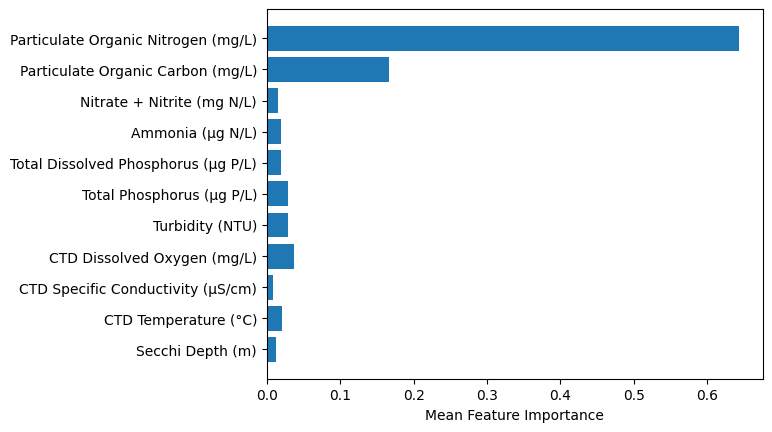

In [21]:
plt.barh(y, x)
 
# setting label of y-axis
 
# setting label of x-axis
plt.xlabel("Mean Feature Importance") 
plt.show()

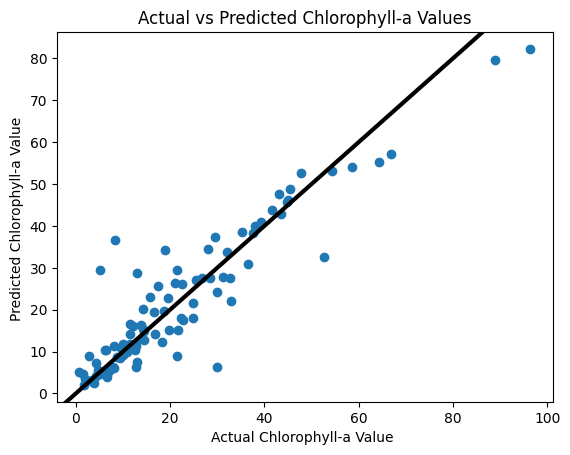

In [23]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, res)
plt.xlabel('Actual Chlorophyll-a Value ')
plt.ylabel('Predicted Chlorophyll-a Value ')
plt.title('Actual vs Predicted Chlorophyll-a Values')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='k', lw=3, scalex=False, scaley=False)
plt.show()